In [ ]:

import csv
import re
import seaborn as sns
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import nltk
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Reading the Annotated data
df = pd.read_csv('/content/drive/MyDrive/Royal Mail Sentiment Analysis Project/Royal mail Data ratings new (old).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Viewing the dataset
df.head(5)

,author_name,Date Published,reviewBody,Annotations
0,LINDSAY HARGREAVES,8/8/2018,The lady I spoke to seem to talk over me.Alway...,Negative
1,Terence King,2/5/2022,Easy website to navigate but holding back pric...,Negative
2,Nick Sargent,3/2/2019,"nice website and great variety, but payment no...",Negative
3,Mrs Caira,9/9/2019,"Online redirection form failed first time, app...",Negative
4,Alan Carter,8/8/2018,"The site is not very custom frendly,you have t...",Negative


In [ ]:
#view shape of dataset
df.shape

(4610, 4)

In [ ]:
#content and structure of data
df.info

<bound method DataFrame.info of               author_name Date Published  \
0      LINDSAY HARGREAVES       8/8/2018   
1            Terence King       2/5/2022   
2            Nick Sargent       3/2/2019   
3               Mrs Caira       9/9/2019   
4             Alan Carter       8/8/2018   
...                   ...            ...   
4605             Customer       2/5/2022   
4606              Paddy K       3/2/2019   
4607              Melanie       9/9/2019   
4608  Eric Bates and Sons       8/8/2018   
4609             Customer       2/5/2022   

                                             reviewBody Annotations  
0     The lady I spoke to seem to talk over me.Alway...    Negative  
1     Easy website to navigate but holding back pric...    Negative  
2     nice website and great variety, but payment no...    Negative  
3     Online redirection form failed first time, app...    Negative  
4     The site is not very custom frendly,you have t...    Negative  
...                

In [ ]:
#view data types
df.dtypes

author_name       object
Date Published    object
reviewBody        object
Annotations       object
dtype: object

In [ ]:
#calculate the total number of rows in the DataFrame df that have at least one missing value.
missing_rows_count = df['reviewBody'].isnull().sum()
print("Total number of missing rows in reviewBody:", missing_rows_count)

Total number of missing rows in reviewBody: 0


In [ ]:
missing_rows_count = df['Annotations'].isnull().sum()
print("Total number of missing rows in Annotations:", missing_rows_count)

Total number of missing rows in Annotations: 0


In [ ]:
##standardizing text and removing noise, to make making it easier to extract meaningful features from the text for further analysis or model training. i e performing a string replacement operation on the 'reviewBody' column of the dataframe df. The purpose of this operation is to clean the text data in the 'reviewBody' column by removing any characters that are not letters (both uppercase and lowercase) or the '#'

df['reviewBody'] = df['reviewBody'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-24-d458c2ef09ff>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewBody'] = df['reviewBody'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
#converting all the text in the 'reviewBody' column to lowercase letters.ie text normalization or lowercase conversion
df['reviewBody'] = df['reviewBody'].str.casefold()
print (df.head(10))

          author_name Date Published  \
0  LINDSAY HARGREAVES       8/8/2018   
1        Terence King       2/5/2022   
2        Nick Sargent       3/2/2019   
3           Mrs Caira       9/9/2019   
4         Alan Carter       8/8/2018   
5       Joanna Rankin       2/5/2022   
6               Neil        3/2/2019   
7   Christine Sifleet       9/9/2019   
8             David P       8/8/2018   
9    Unhappy Customer       2/5/2022   

                                          reviewBody Annotations  
0  the lady i spoke to seem to talk over me alway...    Negative  
1  easy website to navigate but holding back pric...    Negative  
2  nice website and great variety  but payment no...    Negative  
3  online redirection form failed first time  app...    Negative  
4  the site is not very custom frendly you have t...    Negative  
5  i redirected my post back in march for myself ...    Negative  
6  reasonable but could be more user friendly  su...    Positive  
7                      

In [ ]:
#specifing  common English stop words to be be excluded from the feature set. Also, indicating both unigrams (single words) and bigrams (pairs of words) should be considered as features. As bigrams can capture certain contextual information and improve the analysis.
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [ ]:
#to analyze the sentiment of text data and obtain sentiment scores, such as positive, negative, and neutral scores, to assess the sentiment of individual sentences or documents.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [ ]:
sentiments = SIA()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["reviewBody"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["reviewBody"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["reviewBody"]]
df_cleaned = df[["reviewBody", "Positive", "Negative", "Neutral"]]
print(df_cleaned.head(10))

<ipython-input-36-b3ac6ac698ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["reviewBody"]]
<ipython-input-36-b3ac6ac698ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["reviewBody"]]


                                           reviewBody  Positive  Negative  \
0   the lady i spoke to seem to talk over me alway...     0.074     0.126   
1   easy website to navigate but holding back pric...     0.078     0.247   
2   nice website and great variety  but payment no...     0.095     0.309   
3   online redirection form failed first time  app...     0.000     0.163   
4   the site is not very custom frendly you have t...     0.051     0.122   
5   i redirected my post back in march for myself ...     0.017     0.077   
6   reasonable but could be more user friendly  su...     0.166     0.000   
9   don t see how you should register just to get ...     0.104     0.000   
12  i know covid is delay in everything but this w...     0.170     0.100   
13  as far as i m aware  all my mail was redirecte...     0.027     0.000   

    Neutral  
0     0.800  
1     0.676  
2     0.596  
3     0.837  
4     0.827  
5     0.907  
6     0.834  
9     0.896  
12    0.729  
13    0.973 

<ipython-input-36-b3ac6ac698ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["reviewBody"]]


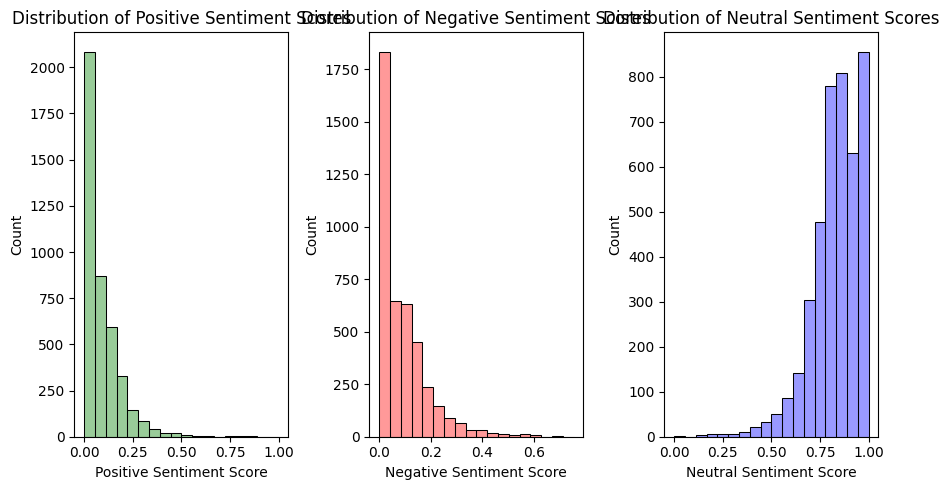

In [ ]:
 #Create histograms for the sentiment scores
plt.figure(figsize=(9, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned["Positive"], bins=18, color="green", alpha=0.4)
plt.title("Distribution of Positive Sentiment Scores")
plt.xlabel("Positive Sentiment Score")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned["Negative"], bins=18, color="red", alpha=0.4)
plt.title("Distribution of Negative Sentiment Scores")
plt.xlabel("Negative Sentiment Score")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned["Neutral"], bins=18, color="blue", alpha=0.4)
plt.title("Distribution of Neutral Sentiment Scores")
plt.xlabel("Neutral Sentiment Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.describe()

,Positive,Negative,Neutral
count,4219.000000,4219.000000,4219.000000
mean,0.081742,0.083407,0.834856
std,0.103891,0.100960,0.129487
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.769000
50%,0.057000,0.058000,0.846000
75%,0.128000,0.129000,0.920000
max,1.000000,0.754000,1.000000


In [ ]:
#Review lenght
df_cleaned["length"] = df_cleaned["reviewBody"].astype(str).apply(len)

<ipython-input-39-ff7d9b4158f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["length"] = df_cleaned["reviewBody"].astype(str).apply(len)


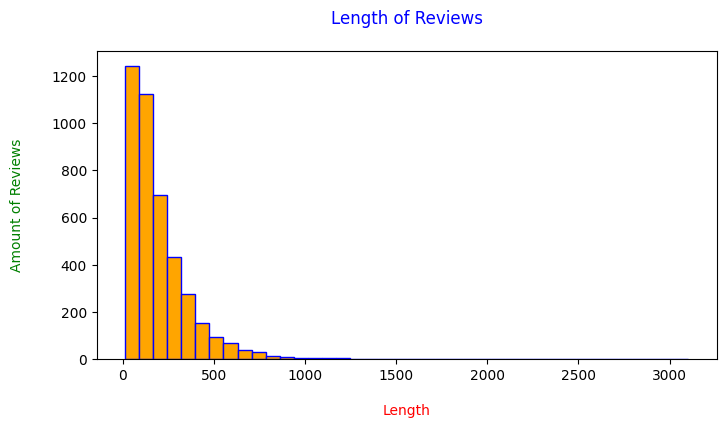

In [ ]:
df_cleaned["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (8,4))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

This allows us to determine that the reviewBody's text length will be between 0 and 2,000 characters. Some of the reviews are longer than 1,000 characters as a result of the rightward skew. In spite of the fact that the text preprocessing stage has an impact on this, some words may have already been removed.  


In [ ]:
#Word count
df_cleaned["word_counts"] = df_cleaned["reviewBody"].apply(lambda x: len(str(x).split()))

<ipython-input-41-8d58ace3389b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["word_counts"] = df_cleaned["reviewBody"].apply(lambda x: len(str(x).split()))


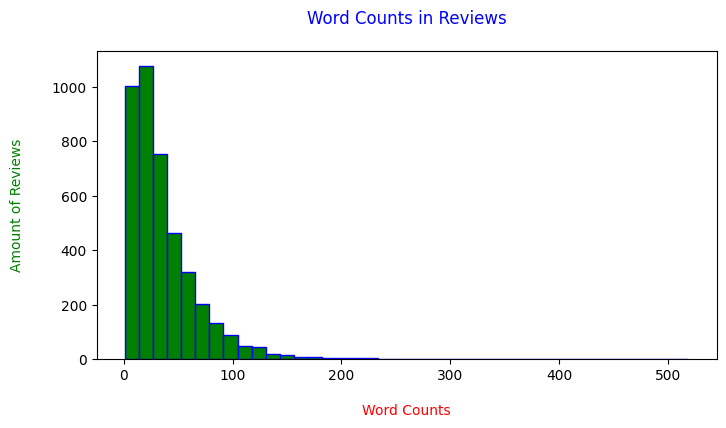

In [ ]:
df_cleaned["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "green", figsize = (8,4))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

The majority of reviews, according to the aforementioned graph, are between 0 and 200 words long. Similar to before, the distribution is right-skewed, and our text preprocessing step earlier has an impact on the calculation.

N-Gram Analysis

N-Gram Function

In [ ]:


def ngram_analysis(corpus, gram, top_n):
    # Create CountVectorizer with specified n-gram range
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(gram, gram))

    # Generate n-grams matrix
    ngrams = vectorizer.fit_transform(corpus)

    # Calculate n-gram frequency
    ngram_counts = ngrams.sum(axis=0)

    # Get feature names and their corresponding counts
    feature_names = vectorizer.get_feature_names()
    ngram_freq = [(feature_names[i], ngram_counts[0, i]) for i in range(len(feature_names))]

    # Sort the list in descending order based on count
    sorted_ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

    # Return top N n-grams
    return sorted_ngram_freq[:top_n]

In [ ]:
print(df_cleaned["reviewBody"])

0       the lady i spoke to seem to talk over me alway...
1       easy website to navigate but holding back pric...
2       nice website and great variety  but payment no...
3       online redirection form failed first time  app...
4       the site is not very custom frendly you have t...
                              ...                        
4605    i have a registered account but still spent ha...
4606    it s not difficul to purchase from royal mail ...
4607    it seems that with every order there is an iss...
4608    items are easy to purchase and delivery is pro...
4609    no next day delivery for stamp collections   c...
Name: reviewBody, Length: 4219, dtype: object


In [ ]:
df_cleaned.head(10)

,reviewBody,Positive,Negative,Neutral,length,word_counts
0,the lady i spoke to seem to talk over me alway...,0.074,0.126,0.800,391,78
1,easy website to navigate but holding back pric...,0.078,0.247,0.676,125,20
2,nice website and great variety but payment no...,0.095,0.309,0.596,190,37
3,online redirection form failed first time app...,0.000,0.163,0.837,126,18
4,the site is not very custom frendly you have t...,0.051,0.122,0.827,123,25
5,i redirected my post back in march for myself ...,0.017,0.077,0.907,446,82
6,reasonable but could be more user friendly su...,0.166,0.000,0.834,201,34
9,don t see how you should register just to get ...,0.104,0.000,0.896,136,28
12,i know covid is delay in everything but this w...,0.170,0.100,0.729,78,15
13,as far as i m aware all my mail was redirecte...,0.027,0.000,0.973,275,54


In [ ]:
df.head(10)

,author_name,Date Published,reviewBody,Annotations,Positive,Negative,Neutral
0,LINDSAY HARGREAVES,8/8/2018,the lady i spoke to seem to talk over me alway...,1,0.074,0.126,0.800
1,Terence King,2/5/2022,easy website to navigate but holding back pric...,1,0.078,0.247,0.676
2,Nick Sargent,3/2/2019,nice website and great variety but payment no...,1,0.095,0.309,0.596
3,Mrs Caira,9/9/2019,online redirection form failed first time app...,1,0.000,0.163,0.837
4,Alan Carter,8/8/2018,the site is not very custom frendly you have t...,1,0.051,0.122,0.827
5,Joanna Rankin,2/5/2022,i redirected my post back in march for myself ...,1,0.017,0.077,0.907
6,Neil,3/2/2019,reasonable but could be more user friendly su...,2,0.166,0.000,0.834
9,Unhappy Customer,2/5/2022,don t see how you should register just to get ...,1,0.104,0.000,0.896
12,Customer David Lengden,8/8/2018,i know covid is delay in everything but this w...,2,0.170,0.100,0.729
13,Victoria Farrell,2/5/2022,as far as i m aware all my mail was redirecte...,1,0.027,0.000,0.973


In [ ]:
#Reading the Annotated data
df = pd.read_csv('/content/drive/MyDrive/Royal Mail Sentiment Analysis Project/Royal mail Data ratings new (old).csv')

In [ ]:
df.head(10)

,author_name,Date Published,reviewBody,Annotations
0,LINDSAY HARGREAVES,8/8/2018,The lady I spoke to seem to talk over me.Alway...,Negative
1,Terence King,2/5/2022,Easy website to navigate but holding back pric...,Negative
2,Nick Sargent,3/2/2019,"nice website and great variety, but payment no...",Negative
3,Mrs Caira,9/9/2019,"Online redirection form failed first time, app...",Negative
4,Alan Carter,8/8/2018,"The site is not very custom frendly,you have t...",Negative
5,Joanna Rankin,2/5/2022,I redirected my post back in March for myself ...,Negative
6,Neil,3/2/2019,"Reasonable but could be more user friendly, su...",Positive
7,Christine Sifleet,9/9/2019,Very very expensive,Neutral
8,David P,8/8/2018,Wasn't aware that charges were now applicable ...,Neutral
9,Unhappy Customer,2/5/2022,Don’t see how you should register just to get ...,Negative


In [ ]:
# Drop rows with 'Neutral' under 'Annotations' column
df = df[df['Annotations'] != 'Neutral']

print(df.head(20))

               author_name Date Published  \
0       LINDSAY HARGREAVES       8/8/2018   
1             Terence King       2/5/2022   
2             Nick Sargent       3/2/2019   
3                Mrs Caira       9/9/2019   
4              Alan Carter       8/8/2018   
5            Joanna Rankin       2/5/2022   
6                    Neil        3/2/2019   
9         Unhappy Customer       2/5/2022   
12  Customer David Lengden       8/8/2018   
13        Victoria Farrell       2/5/2022   
14         Hilary Franklin       3/2/2019   
16          Gary Langridge       8/8/2018   
17               Jon White       2/5/2022   
18                Customer       3/2/2019   
19             Mrs G Pratt       9/9/2019   
21                Customer       2/5/2022   
22            Gail Collins       3/2/2019   
23           Eddie Jacques       9/9/2019   
26         Suzanne Moorman       3/2/2019   
27                     DVB       9/9/2019   

                                           reviewBody 

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Encoding  Target Variable
Encoder = LabelEncoder()
df["Annotations"] = Encoder.fit_transform(df["Annotations"])

df["Annotations"].value_counts()


1    3174
2    1043
0       2
Name: Annotations, dtype: int64

In [ ]:
# Split the dataset into input features (review Body) and target variable (Annotations)
X = df['reviewBody']
y = df['Annotations']

In [ ]:
# Initialize the TF-IDF vectorizer for X
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_vec = vectorizer.fit_transform(X)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Apply random oversampling to balance the training data for X_vec and y
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_vec, y)

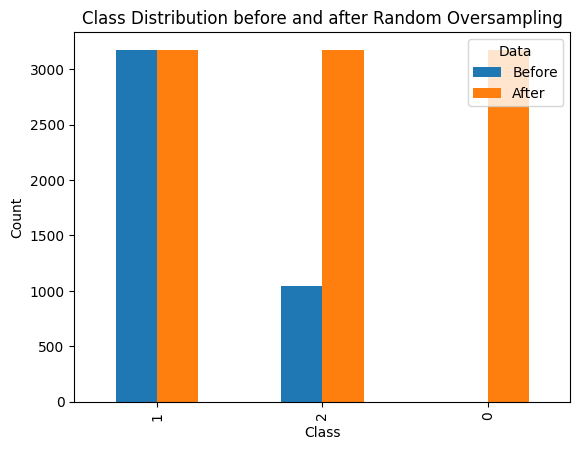

In [ ]:
# Count the number of samples in each class in the original training data
class_counts_before = y.value_counts()

# Count the number of samples in each class after random oversampling
class_counts_after = y_resampled.value_counts()

# Create a DataFrame to combine the class counts before and after oversampling
class_counts_df = pd.DataFrame({'Before': class_counts_before, 'After': class_counts_after})

# Plot the bar chart
class_counts_df.plot(kind='bar')
plt.title('Class Distribution before and after Random Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Data')
plt.show()

In [ ]:
print(df['Annotations'].dtype)

int64


In [ ]:
print(df['reviewBody'].dtype)

object


In [ ]:
# converting Annotations to integers
df['reviewBody'] = pd.to_numeric(df['reviewBody'], errors='coerce').fillna(0).astype(int)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#converting text to numerical representation
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
print(X_train_vec[:10])
print(X_test_vec[:10])


  (0, 36432)	0.19604205170686975
  (0, 43101)	0.11619601099666835
  (0, 27175)	0.19604205170686975
  (0, 1860)	0.1747367343824352
  (0, 41247)	0.19604205170686975
  (0, 19903)	0.19604205170686975
  (0, 14679)	0.19604205170686975
  (0, 18572)	0.19604205170686975
  (0, 1319)	0.19604205170686975
  (0, 11361)	0.19604205170686975
  (0, 40141)	0.19604205170686975
  (0, 21479)	0.1866142986021739
  (0, 3462)	0.17992520132231846
  (0, 6343)	0.19604205170686975
  (0, 36157)	0.19604205170686975
  (0, 26229)	0.1747367343824352
  (0, 37936)	0.19604205170686975
  (0, 36182)	0.19604205170686975
  (0, 1372)	0.19604205170686975
  (0, 15611)	0.17049744821762258
  (0, 36368)	0.08386874189154041
  (0, 43091)	0.10885970731759043
  (0, 27107)	0.10779047525429848
  (0, 1663)	0.07434779547521622
  (0, 41246)	0.1610696951129267
  :	:
  (9, 43441)	0.2541981255924592
  (9, 40525)	0.17804907243637272
  (9, 7465)	0.2541981255924592
  (9, 29246)	0.2541981255924592
  (9, 10124)	0.2541981255924592
  (9, 37498)	0.1934

In [ ]:
# Train a LinearSVC model
model = LinearSVC()
model.fit(X_train_vec, y_train)

LinearSVC()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

In [ ]:
# Evaluate the performance of the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.76      0.93      0.84       638
           2       0.30      0.09      0.14       206

    accuracy                           0.73       844
   macro avg       0.53      0.51      0.49       844
weighted avg       0.65      0.73      0.67       844



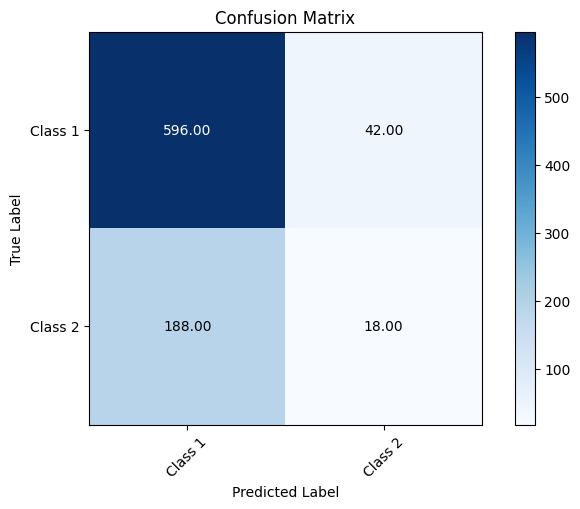

In [ ]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]:.2f}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Define class labels
class_names = ['Class 1', 'Class 2']

# Plot confusion matrix
plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()


Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()
logreg_model = LogisticRegression()

In [ ]:
model.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.76      0.99      0.86       638
           2       0.44      0.02      0.04       206

    accuracy                           0.75       844
   macro avg       0.60      0.51      0.45       844
weighted avg       0.68      0.75      0.66       844



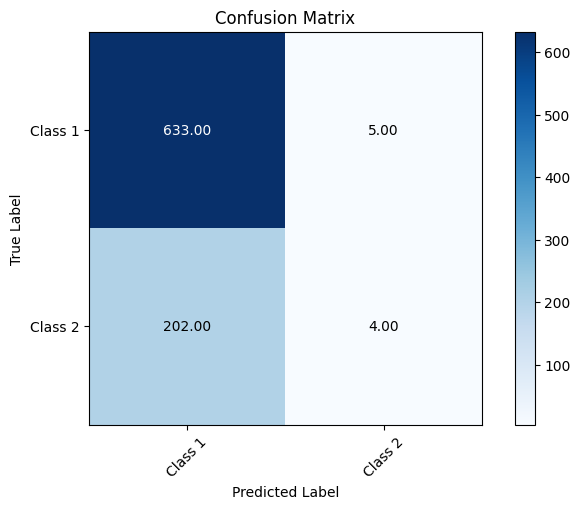

In [ ]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]:.2f}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Define class labels
class_names = ['Class 1', 'Class 2']

# Plot confusion matrix
plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:

# Initialize the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:

# Make predictions on the test data
y_pred = model.predict(X_test_vec)

In [ ]:
# Evaluate the performance of the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.76      0.91      0.83       638
           2       0.24      0.09      0.13       206

    accuracy                           0.71       844
   macro avg       0.50      0.50      0.48       844
weighted avg       0.63      0.71      0.66       844



In [ ]:
cm = confusion_matrix(y_test, y_pred)

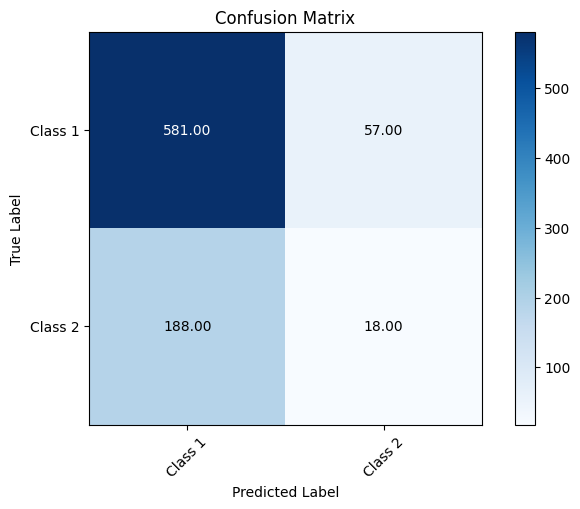

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]:.2f}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Define class labels
class_names = ['Class 1', 'Class 2']

# Plot confusion matrix
plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()

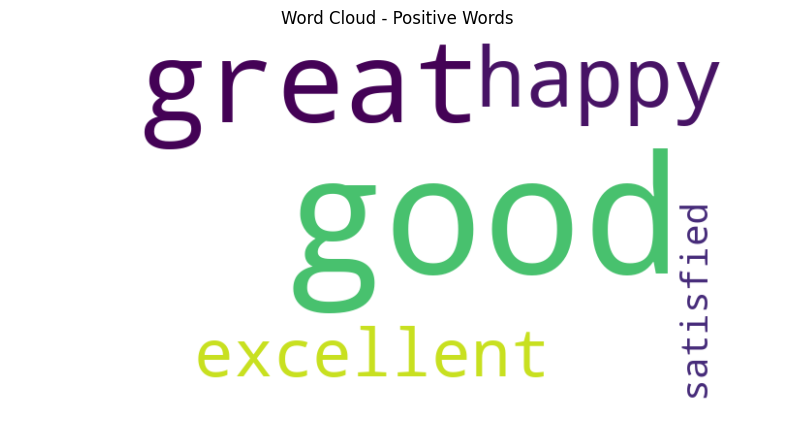

In [ ]:
# Combine the positive words into a single string
positive_text = ' '.join(positive_reviews)

# Create a WordCloud object for positive words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Words')
plt.show()

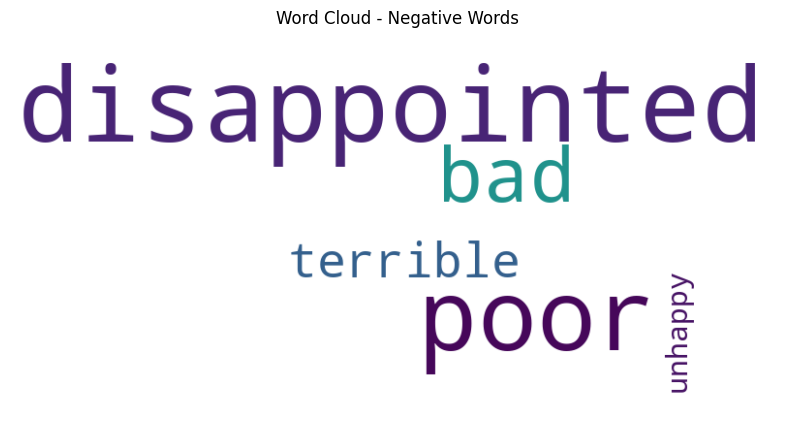

In [ ]:


# Combine the negative words into a single string
negative_text = ' '.join(negative_reviews)

# Create a WordCloud object for negative words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Words')
plt.show()

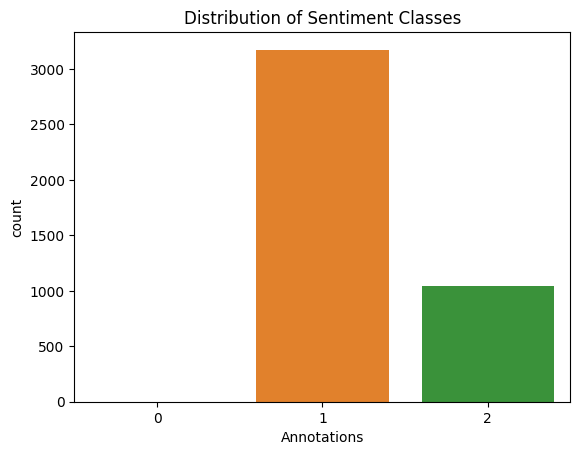

TypeError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment classes
sns.countplot(x='Annotations', data=df)
plt.title('Distribution of Sentiment Classes')
plt.show()

# Plot the distribution of text lengths
df['text_length'] = df['reviewBody'].apply(len)
sns.histplot(data=df, x='text_length')
plt.title('Distribution of Text Lengths')
plt.show()



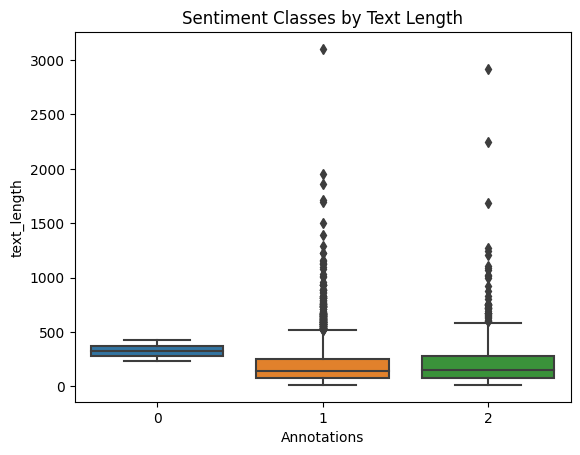

In [ ]:
sns.boxplot(x='Annotations', y='text_length', data=df)
plt.title('Sentiment Classes by Text Length')
plt.show()

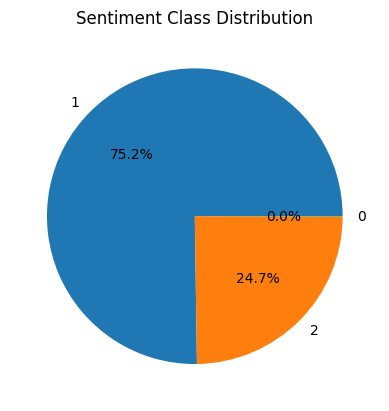

In [ ]:
sentiment_counts = df['Annotations'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Class Distribution')
plt.show()

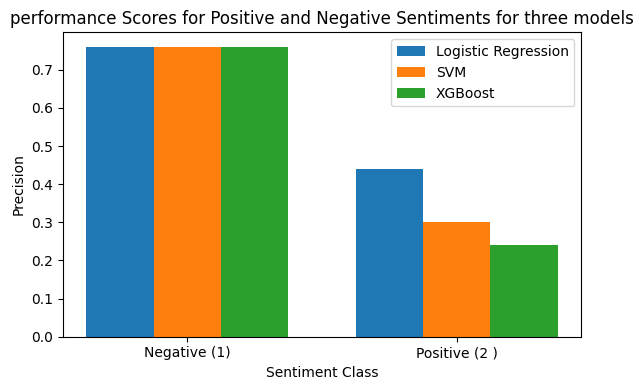

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Precisions for each model
precision_lr = [0.76, 0.44]
precision_svm = [0.76, 0.30]
precision_xgb = [0.76, 0.24]

# Class labels
classes = ['Negative (1)', 'Positive (2 )']

# Create bar positions
bar_positions = np.arange(len(classes))

# Bar width
bar_width = 0.25

# Create a figure and a set of subplots with a smaller size
fig, ax = plt.subplots(figsize=(6, 4))

# Create grouped bar plots for each model's precision
ax.bar(bar_positions - bar_width, precision_lr, width=bar_width, label='Logistic Regression')
ax.bar(bar_positions, precision_svm, width=bar_width, label='SVM')
ax.bar(bar_positions + bar_width, precision_xgb, width=bar_width, label='XGBoost')

# Set labels and title
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Precision')
ax.set_title('performance Scores for Positive and Negative Sentiments for three models')
ax.set_xticks(bar_positions)
ax.set_xticklabels(classes)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

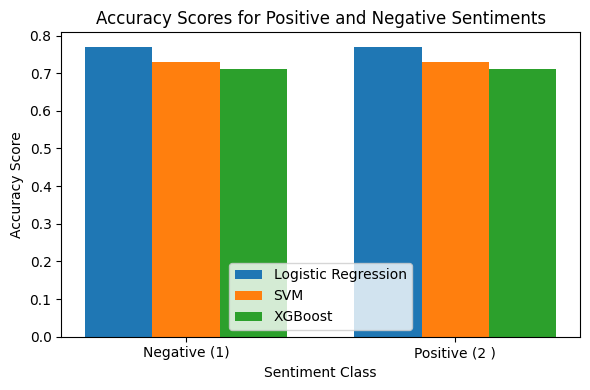

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy for each model
precision_lr = [ 0.77]
precision_svm = [ 0.73]
precision_xgb = [ 0.71]

# Class labels
classes = ['Negative (1)', 'Positive (2 )']

# Create bar positions
bar_positions = np.arange(len(classes))

# Bar width
bar_width = 0.25

# Create a figure and a set of subplots with a smaller size
fig, ax = plt.subplots(figsize=(6, 4))

# Create grouped bar plots for each model's precision
ax.bar(bar_positions - bar_width, precision_lr, width=bar_width, label='Logistic Regression')
ax.bar(bar_positions, precision_svm, width=bar_width, label='SVM')
ax.bar(bar_positions + bar_width, precision_xgb, width=bar_width, label='XGBoost')

# Set labels and title
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Positive and Negative Sentiments')
ax.set_xticks(bar_positions)
ax.set_xticklabels(classes)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with your actual metrics for each class and each model
stanza_metrics = [[0.85, 0.75], [0.65, 0.80]]  # Example metrics for Stanza
logreg_metrics = [[0.80, 0.70], [0.75, 0.85]]  # Example metrics for Logistic Regression

class_names = ['Negative 0', 'positive 1']  # Replace with your actual class names

# Create a matrix for Stanza and Logistic Regression metrics
metrics_matrix = [stanza_metrics, logreg_metrics]

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_matrix, annot=True, cmap='YlGnBu', xticklabels=class_names, yticklabels=['Stanza', 'Logistic Regression'])
plt.xlabel('Classes')
plt.ylabel('Models')
plt.title('Model Comparison Heatmap')
plt.show()

ValueError: ignored

<Figure size 1000x600 with 0 Axes>